TABLE OF CONTENTS

- .	Import libraries, define path, and import DataFrame. Due to memory issues. I added department names to my dataframe 
- 5. The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database.
    - 5a. Create customer profile based on age
    - 5b. Create customer profile based on income
    - 5c. Create customer profile based on number of dependants
    - 5d. Create customer profile based on certain goods in the department_id
        I. babies variable
        II. meat fish consumer variable
    - 5e. Create customer profile based on fam_status & dependants
    - 5f. Create customer profile based on age_group & fam_status
    - 5g. Create customer profile based on age_group & income_level
    - 5h. Create customer profile by region based on loyalty flag
- 6. Create an appropriate visualization to show the distribution of profiles.
    - 6a. Create a subset with unique user ids
    - 6b. Create visualizations based on age-group
    - 6c. Create visualizations based on income
    - 6d. Create visuallizations for baby flag
    - 5d. Create visuallizations for meat fish consumers
    - 5e. Create visuallizations for fam_status & dependants
    - 5f. Create visuallizationsfor age_group & fam_status
    - 5g. Create visuallizations for age_group & income_level
    - 5h. Create visuallizations for region based on loyalty flag
- 7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure
- 8. Compare your customer profiles with regions and departments
   - 8a. Family structure customer profile study
   - 8b. Age group and class level customer profile study
   - 8c. Age group and loyalty flag customer profile study
   - 8d. Age group and price range customer profile study
   - 8e. Relationship between orders, family structure and region
   - 8f. Relationship between orders, age group class level and region
   - 8g. Average spent, order frequency and product prefernce for age group class level profile
   - 8h. Department preference by region
   - 8i. Departement preference by age group
   
Key Questions

- 1 What the busiest days of the week and hours of the day?
- 2 Times of the day when people spend the most money.
- 3 Instacart has a lot of products with different price tags. Marketing and sales want to use simpler price range groupings to help direct their efforts
- 4 Which departments have the highest frequency or product orders?
- 5 The marketing and sales teams are particularly interested in the different types of customers in their system and how their ordering behaviors differ
    - 5a. What’s the distribution among users in regards to their brand loyalty (i.e., how often do they return to Instacart)?
    - 5b. Are there differences in ordering habits based on a customer’s loyalty status?

# Import libraries, define path & import latest marged dataframe 

In [1]:
## Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## Define path

path = r'/Users/aislingm/Documents/02-08-2023 Instacart Basket Analysis'

## Import Dataframe

df_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_final_all.pkl'))

In [2]:
# Check shape of dataframe

df_all.shape

(30964564, 33)

# 5. The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database.

## 5a. Create customer profile based on age.

In [3]:
# Check descriptive statistics for the age variable in order to define my groups

df_all['age'].describe()

count    3.096456e+07
mean     4.946803e+01
std      1.848528e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

In [4]:
# Create age_flag by defining 3 groups: young adults, middle age adult and senior.

df_all['age_flag'] = 'young adults'
df_all.loc[(df_all['age'] > 36) & (df_all['age'] <= 65), 'age_flag'] = 'middle age adults'
df_all.loc[df_all['age'] > 65, 'age_flag'] = 'senior'

In [5]:
# consistency checks

df_all.shape

(30964564, 34)

In [6]:
# Check results's frequency

df_all['age_flag'].value_counts(dropna = False)

middle age adults    14034276
young adults          9199454
senior                7730834
Name: age_flag, dtype: int64

## 5b. Create customer profile based on income.

In [7]:
# Check descriptive statistics for the income variable in order to define my groups

df_all['income'].describe()

count    3.096456e+07
mean     9.967587e+04
std      4.314187e+04
min      2.590300e+04
25%      6.729200e+04
50%      9.676500e+04
75%      1.281020e+05
max      5.939010e+05
Name: income, dtype: float64

In [8]:
# Create income flag by defining 3 groups based on the results of my descriptive analysis

df_all['income_level'] = 'low income'
df_all.loc[(df_all['income'] > 67292) & (df_all['income'] <= 128102), 'income_level'] = 'medium income'
df_all.loc[df_all['income'] > 128102, 'income_level'] = 'high income'

In [9]:
# Consistency and frequency checks

df_all.shape

(30964564, 35)

In [10]:
df_all['income_level'].value_counts(dropna = False)

medium income    15482125
low income        7741348
high income       7741091
Name: income_level, dtype: int64

## 5.c Create customer profile variable based on number of dependents.


In [11]:
## I based the grouping of my dependants_flag on if there is a child or not in the family

df_all['dependants_flag'] = 'without children'
df_all.loc[df_all['n_dependants'] > 0, 'dependants_flag'] = 'with children'

In [12]:
df_all.shape

(30964564, 36)

In [13]:
# Check result's frequency
df_all['dependants_flag'].value_counts(dropna = False)

with children       23224883
without children     7739681
Name: dependants_flag, dtype: int64

## 5.d Create customer profile variable based on certain goods in the department_id.


In [14]:
df_all.head()

,user_id,gender,state,age,date_joined,n_dependants,fam_status,income,order_id,order_number,...,avg_spend,spending_level,median_days_since_prior,order_frequency_level,region,activity,department,age_flag,income_level,dependants_flag
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,...,7.988889,Low spender,19.0,Regular Customer,Midwest,high_activity,beverages,middle age adults,high income,with children
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,...,7.988889,Low spender,19.0,Regular Customer,Midwest,high_activity,beverages,middle age adults,high income,with children
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,...,7.988889,Low spender,19.0,Regular Customer,Midwest,high_activity,beverages,middle age adults,high income,with children
3,33890,Female,New Mexico,36,1/1/2017,0,single,59285,1044841,3,...,7.057534,Low spender,26.0,Non-frequent Customer,West,high_activity,beverages,young adults,low income,without children
4,33890,Female,New Mexico,36,1/1/2017,0,single,59285,474720,4,...,7.057534,Low spender,26.0,Non-frequent Customer,West,high_activity,beverages,young adults,low income,without children


In [15]:
# My current dataframe contains the department name information. I will view these values in order to choose goods
# by which to create the above.

df_all['department'].unique()

array(['beverages', 'dairy eggs', 'produce', 'snacks', 'canned goods',
       'pantry', 'bakery', 'meat seafood', 'personal care', 'breakfast',
       'deli', 'frozen', 'dry goods pasta', 'household', 'pets',
       'international', 'alcohol', 'missing', 'bulk', 'babies', 'other'],
      dtype=object)

### Customer profile based on babies department

In [16]:
# Create the new 'baby_flag' column using vectorized operations

df_all['baby_flag'] = df_all['department'].apply(lambda x: 'has babies' if x == 'babies' else 'no babies')


In [17]:
df_all.shape

(30964564, 37)

In [18]:
df_all['baby_flag'].value_counts()

no babies     30554172
has babies      410392
Name: baby_flag, dtype: int64

In [19]:
# Create the new 'meat/fish_buyer_flag' column using vectorized operations

df_all['meat_fish_consumer_flag'] = df_all['department'].apply(lambda x: 'eats meat/fish' if x == 'meat seafood' else 'does not eat meat/fish')


In [20]:
df_all['meat_fish_consumer_flag'].value_counts()

does not eat meat/fish    30289783
eats meat/fish              674781
Name: meat_fish_consumer_flag, dtype: int64

## 5.e Customer profile based on fam_status & dependants

In [ ]:
# Create an empty column to store the combined values
#df_all['fam_structure'] = ''

# Iterate through each row using .loc and set the combined values
#for index, row in df_all.iterrows():
    #df_all.loc[index, 'fam_structure'] = f"{row['fam_status']} {row['dependants_flag']}"
# I tried using the above code to create my new customer profile but after 60mn I still had no
#output I will try try the .loc using nested loops

In [21]:
df_all['fam_status'].value_counts()

married                             21743711
single                               5094410
divorced/widowed                     2645271
living with parents and siblings     1481172
Name: fam_status, dtype: int64

In [22]:
# Creating fam_structure variable:

df_all.loc[(df_all['fam_status'] == 'married') & (df_all['dependants_flag'] == 'with children'), 'fam_structure'] = 'couple with kids'
df_all.loc[(df_all['fam_status'] == 'married') & (df_all['dependants_flag'] == 'without children'), 'fam_structure'] = 'couple no kids'
df_all.loc[(df_all['fam_status'] == 'single') | (df_all['fam_status'] == 'divorced/widowed') & (df_all['dependants_flag'] == 'with children'), 'fam_structure'] = 'single with kids'
df_all.loc[(df_all['fam_status'] == 'single') | (df_all['fam_status'] == 'divorced/widowed') & (df_all['dependants_flag'] == 'without children'), 'fam_structure'] = 'single without kids'
df_all.loc[(df_all['fam_status'] == 'living with parents and siblings') & (df_all['dependants_flag'] == 'with children'), 'fam_structure'] = 'grand children in house'
df_all.loc[(df_all['fam_status'] == 'living with parents and siblings') & (df_all['dependants_flag'] == 'without children'), 'fam_structure'] = 'grand childrennot in house'


In [23]:
df_all['fam_structure'].value_counts()

couple with kids           21743711
single without kids         7739681
grand children in house     1481172
Name: fam_structure, dtype: int64

In [24]:
df_all.shape

(30964564, 39)

## 5.f Customer profile based on age and fam_status

In [25]:
df_all['age_flag'].value_counts()

middle age adults    14034276
young adults          9199454
senior                7730834
Name: age_flag, dtype: int64

In [26]:
# Creating customer profile based on age and fam_status (ss_age_flag)

df_all.loc[(df_all['fam_status'] == 'married') & (df_all['age_flag'] == 'young adults'), 'ss_age_flag'] = 'married young adult'
df_all.loc[(df_all['fam_status'] == 'married') & (df_all['age_flag'] == 'middle age adults'), 'ss_age_flag'] = 'married middle aged'
df_all.loc[(df_all['fam_status'] == 'married') & (df_all['age_flag'] == 'senior'), 'ss_age_flag'] = 'married senior'
df_all.loc[(df_all['fam_status'] == 'single') | (df_all['fam_status'] == 'divorced/widowed') & (df_all['age_flag'] == 'young adults'), 'ss_age_flag'] = 'single young adult'
df_all.loc[(df_all['fam_status'] == 'single') | (df_all['fam_status'] == 'divorced/widowed') & (df_all['age_flag'] == 'middle age adults'), 'ss_age_flag'] = 'single middle age'
df_all.loc[(df_all['fam_status'] == 'single') | (df_all['fam_status'] == 'divorced/widowed') & (df_all['age_flag'] == 'senior'), 'ss_age_flag'] = 'single senior'
df_all.loc[(df_all['fam_status'] == 'living with parents and siblings') & (df_all['age_flag'] == 'young adults'), 'ss_age_flag'] = 'young adult living with fam'
df_all.loc[(df_all['fam_status'] == 'living with parents and siblings') & (df_all['age_flag'] == 'middle age adults'), 'ss_age_flag'] = 'middle age living with fam'
df_all.loc[(df_all['fam_status'] == 'living with parents and siblings') & (df_all['age_flag'] == 'senior'), 'ss_age_flag'] = 'senior living with fam'


In [27]:
df_all['ss_age_flag'].value_counts()

married middle aged            10492796
single senior                   7000131
married senior                  5825113
married young adult             5425802
young adult living with fam     1481172
single middle age                739550
Name: ss_age_flag, dtype: int64

In [28]:
df_all.shape

(30964564, 40)

## 5.g Customer profile based on age and class level

In [29]:
# Check values for age_flag variable

df_all['age_flag'].value_counts()

middle age adults    14034276
young adults          9199454
senior                7730834
Name: age_flag, dtype: int64

In [30]:
# Check values for 'income_level'

df_all['income_level'].value_counts()

medium income    15482125
low income        7741348
high income       7741091
Name: income_level, dtype: int64

In [31]:
# Create 'age_group_class_level' variable

df_all.loc[(df_all['age_flag'] == 'young adults') & (df_all['income_level'] == 'low income'), 'age_group_class_level'] = 'lower class young adult'
df_all.loc[(df_all['age_flag'] == 'young adults') & (df_all['income_level'] == 'medium income'), 'age_group_class_level'] = 'middle class young adult'
df_all.loc[(df_all['age_flag'] == 'young adults') & (df_all['income_level'] == 'high income'), 'age_group_class_level'] = 'upper class young adult'

df_all.loc[(df_all['age_flag'] == 'middle age adults') & (df_all['income_level'] == 'low income'), 'age_group_class_level'] = 'lower class middle-aged'
df_all.loc[(df_all['age_flag'] == 'middle age adults') & (df_all['income_level'] == 'medium income'), 'age_group_class_level'] = 'middle class middle-aged'
df_all.loc[(df_all['age_flag'] == 'middle age adults') & (df_all['income_level'] == 'high income'), 'age_group_class_level'] = 'upper class middle-aged'

df_all.loc[(df_all['age_flag'] == 'senior') & (df_all['income_level'] == 'low income'), 'age_group_class_level'] = 'lower class senior'
df_all.loc[(df_all['age_flag'] == 'senior') & (df_all['income_level'] == 'medium income'), 'age_group_class_level'] = 'middle class senior'
df_all.loc[(df_all['age_flag'] == 'senior') & (df_all['income_level'] == 'high income'), 'age_group_class_level'] = 'upper class senior'



In [32]:
df_all['age_group_class_level'].value_counts()

middle class middle-aged    6867523
middle class young adult    4836383
upper class middle-aged     4677739
lower class young adult     4256199
middle class senior         3778219
upper class senior          2956480
lower class middle-aged     2489014
lower class senior           996135
upper class young adult      106872
Name: age_group_class_level, dtype: int64

In [33]:
## Let's take a look at our dataframe before we export it

pd.options.display.max_columns = None

df_all.head()

,user_id,gender,state,age,date_joined,n_dependants,fam_status,income,order_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spend,spending_level,median_days_since_prior,order_frequency_level,region,activity,department,age_flag,income_level,dependants_flag,baby_flag,meat_fish_consumer_flag,fam_structure,ss_age_flag,age_group_class_level
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,1,9,30.0,196,2,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular Customer,Midwest,high_activity,beverages,middle age adults,high income,with children,no babies,does not eat meat/fish,couple with kids,married middle aged,upper class middle-aged
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,5,15,11.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular Customer,Midwest,high_activity,beverages,middle age adults,high income,with children,no babies,does not eat meat/fish,couple with kids,married middle aged,upper class middle-aged
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,1,15,10.0,196,2,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular Customer,Midwest,high_activity,beverages,middle age adults,high income,with children,no babies,does not eat meat/fish,couple with kids,married middle aged,upper class middle-aged
3,33890,Female,New Mexico,36,1/1/2017,0,single,59285,1044841,3,6,11,30.0,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Most orders,12,Regular customer,7.057534,Low spender,26.0,Non-frequent Customer,West,high_activity,beverages,young adults,low income,without children,no babies,does not eat meat/fish,single without kids,single senior,lower class young adult
4,33890,Female,New Mexico,36,1/1/2017,0,single,59285,474720,4,1,20,16.0,196,6,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest days,Fewest orders,12,Regular customer,7.057534,Low spender,26.0,Non-frequent Customer,West,high_activity,beverages,young adults,low income,without children,no babies,does not eat meat/fish,single without kids,single senior,lower class young adult


## 5.h Customer Profiling by region based on loyalty flag

In [36]:
loyalty_region = pd.crosstab(df_all['region'],df_all['loyalty_flag'],dropna = False)

## Export Dataframe

In [37]:
df_all.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_latest.pkl'))

# 6. Create an appropriate visualization to show the distribution of profiles

## Create a subset with unique user ids with selected columns

In [38]:
subset_cols = ['user_id','order_id', 'age_flag', 'income_level', 'dependants_flag', 'baby_flag', 'fam_structure', 'age_group_class_level']
df_all_subset = df_all[subset_cols]

In [39]:
## Subset checks

df_all_subset.head()

,user_id,order_id,age_flag,income_level,dependants_flag,baby_flag,fam_structure,age_group_class_level
0,26711,2543867,middle age adults,high income,with children,no babies,couple with kids,upper class middle-aged
1,26711,1285508,middle age adults,high income,with children,no babies,couple with kids,upper class middle-aged
2,26711,2578584,middle age adults,high income,with children,no babies,couple with kids,upper class middle-aged
3,33890,1044841,young adults,low income,without children,no babies,single without kids,lower class young adult
4,33890,474720,young adults,low income,without children,no babies,single without kids,lower class young adult


In [40]:
## Remove duplicates from subset to have only unique user_ids

df_all_subset = df_all_subset.drop_duplicates()

In [41]:
df_all_subset.shape

(3234413, 8)

In [42]:
df_all_subset.head()

,user_id,order_id,age_flag,income_level,dependants_flag,baby_flag,fam_structure,age_group_class_level
0,26711,2543867,middle age adults,high income,with children,no babies,couple with kids,upper class middle-aged
1,26711,1285508,middle age adults,high income,with children,no babies,couple with kids,upper class middle-aged
2,26711,2578584,middle age adults,high income,with children,no babies,couple with kids,upper class middle-aged
3,33890,1044841,young adults,low income,without children,no babies,single without kids,lower class young adult
4,33890,474720,young adults,low income,without children,no babies,single without kids,lower class young adult


# 6.b Visualization for age_flag profile

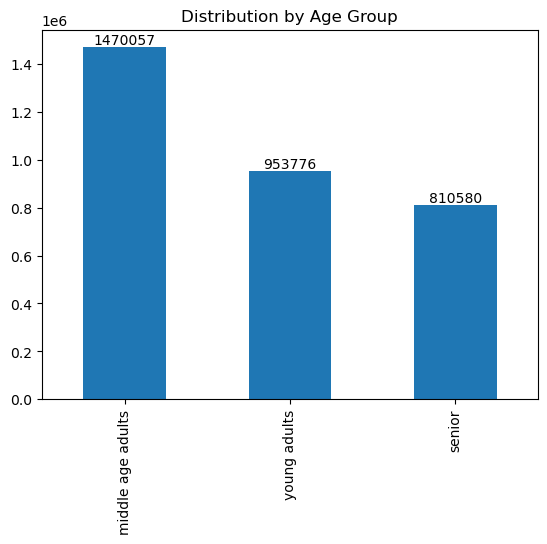

<Figure size 500x500 with 0 Axes>

In [43]:
# Create bar chart for age_flag profile

agebar = df_all_subset['age_flag'].value_counts().plot.bar()

plt.figure(figsize=(5, 5))
agebar.set_title("Distribution by Age Group")

# Annotate each bar with its count
for idx, value in enumerate(df_all_subset['age_flag'].value_counts()):
    agebar.text(idx, value, str(value), ha='center', va='bottom', fontsize=10, color='black')

In [44]:
# Exporting bar chart

agebar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_group.png'), bbox_inches='tight')


/var/folders/m4/vmdq9y9n2fndv5637y77b2nh0000gn/T/ipykernel_31591/3327846878.py:29: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Normalized Count')


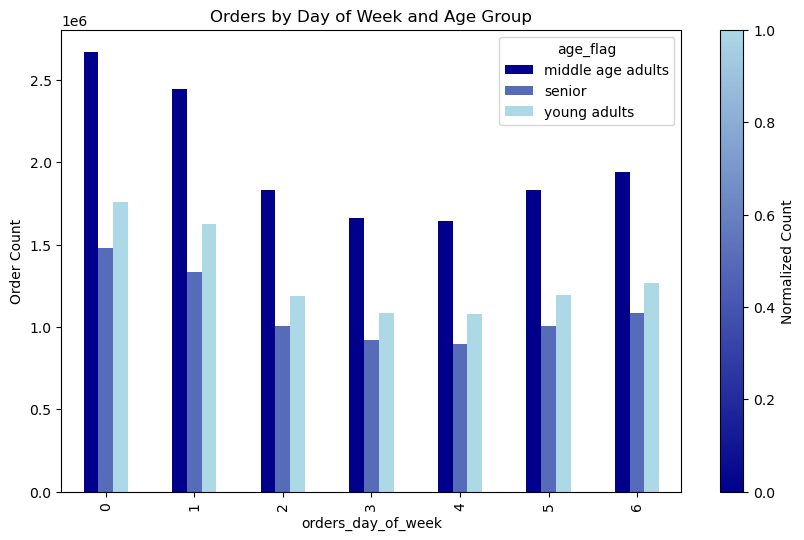

In [45]:
# Create a bar chart for orders_day_of_week by age_flag

import matplotlib.colors as mcolors

# Create crosstab
orders_day_week_age_group = pd.crosstab(df_all['orders_day_of_week'], df_all['age_flag'], dropna = False)

# Calculate the maximum count for each age group
max_counts = orders_day_week_age_group.max(axis=1)

# Calculate normalized values for colors within each age group
normalized_values = orders_day_week_age_group.div(max_counts, axis=0)

# Define a custom blue color gradient
blues = mcolors.LinearSegmentedColormap.from_list("custom_blue", [(0, 'darkblue'), (1, 'lightblue')])

# Create the bar chart
orders_day_week_age_group_viz = orders_day_week_age_group.plot.bar(
    colormap=blues,
    figsize=(10, 6)
)

# Set the y-label
plt.ylabel('Order Count')

# Show the colorbar
sm = plt.cm.ScalarMappable(cmap=blues, norm=plt.Normalize(vmin=0, vmax=1))
sm.set_array([])
plt.colorbar(sm, label='Normalized Count')

plt.title('Orders by Day of Week and Age Group')
plt.show()


In [46]:
# Exporting bar chart

orders_day_week_age_group_viz.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_orders_day_week_age_group.png'), bbox_inches='tight')


## 6.c Visuallization for income_level profile

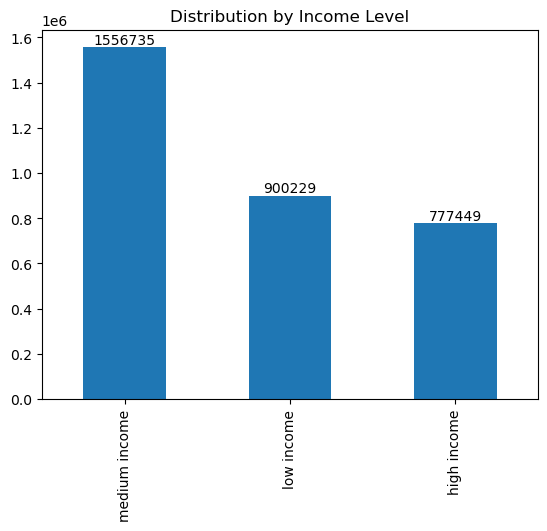

<Figure size 500x500 with 0 Axes>

In [47]:
# Create bar chart for income_level profile

incomebar = df_all_subset['income_level'].value_counts().plot.bar()

plt.figure(figsize=(5, 5))
incomebar.set_title("Distribution by Income Level")

# Annotate each bar with its count
for idx, value in enumerate(df_all_subset['income_level'].value_counts()):
    incomebar.text(idx, value, str(value), ha='center', va='bottom', fontsize=10, color='black')
    

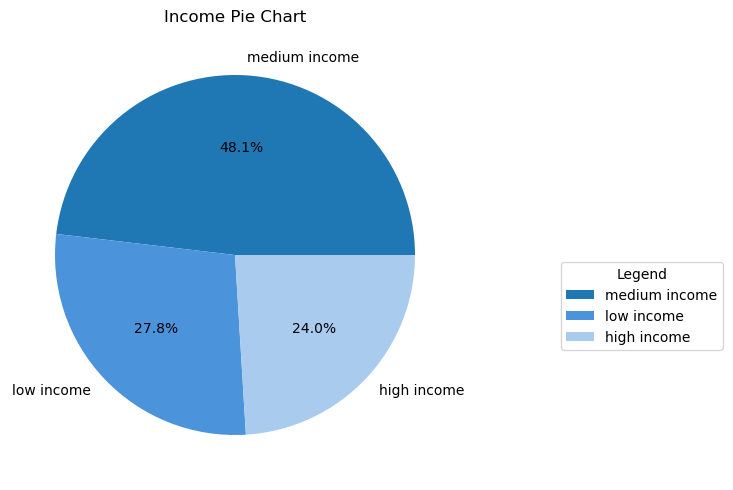

In [48]:
# Blue color palette
blue_palette = ['#1f77b4', '#4b93db', '#a9cbee']

# Create a pie chart for income distribution
income_pie=df_all_subset['income_level'].value_counts().plot.pie(autopct='%1.1f%%', colors=blue_palette)
plt.tight_layout()

# Add a title
plt.title('Income Pie Chart')
plt.xlabel('')
plt.ylabel('')

# Add a legend
plt.legend(title='Legend', bbox_to_anchor=(1.6, 0.5))


In [49]:
# Exporting bar chart

income_pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_pie_chart.png'), bbox_inches='tight')

/var/folders/m4/vmdq9y9n2fndv5637y77b2nh0000gn/T/ipykernel_31591/1804846277.py:29: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Normalized Count')


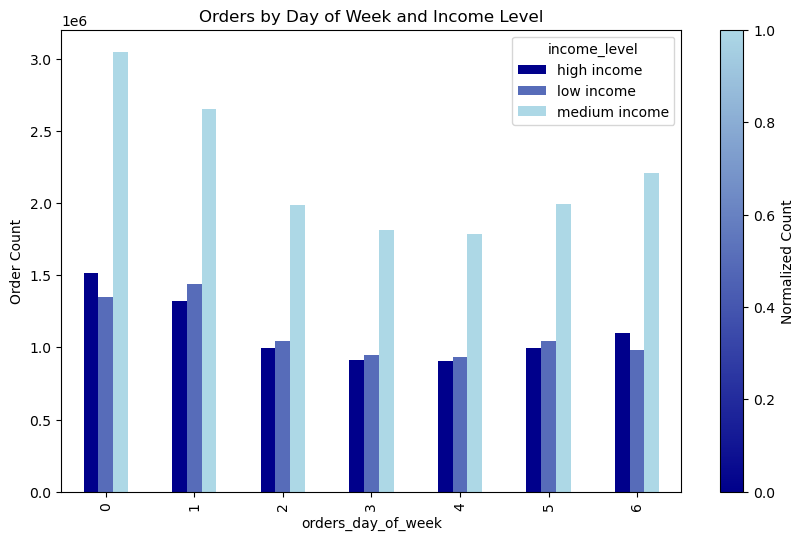

In [50]:
# Create a bar chart for orders_day_of_week by income_level

import matplotlib.colors as mcolors

# Create crosstab
orders_day_week_income_level = pd.crosstab(df_all['orders_day_of_week'], df_all['income_level'], dropna = False)

# Calculate the maximum count for each age group
max_counts = orders_day_week_income_level.max(axis=1)

# Calculate normalized values for colors within each age group
normalized_values = orders_day_week_income_level.div(max_counts, axis=0)

# Define a custom blue color gradient
blues = mcolors.LinearSegmentedColormap.from_list("custom_blue", [(0, 'darkblue'), (1, 'lightblue')])

# Create the bar chart
orders_day_week_income_level_viz = orders_day_week_income_level.plot.bar(
    colormap=blues,
    figsize=(10, 6)
)

# Set the y-label
plt.ylabel('Order Count')

# Show the colorbar
sm = plt.cm.ScalarMappable(cmap=blues, norm=plt.Normalize(vmin=0, vmax=1))
sm.set_array([])
plt.colorbar(sm, label='Normalized Count')

plt.title('Orders by Day of Week and Income Level')
plt.show()

In [51]:
# Exporting bar chart

orders_day_week_income_level_viz.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_orders_day_week_income_level.png'), bbox_inches='tight')


## 6.d Visualization for baby_flag profile

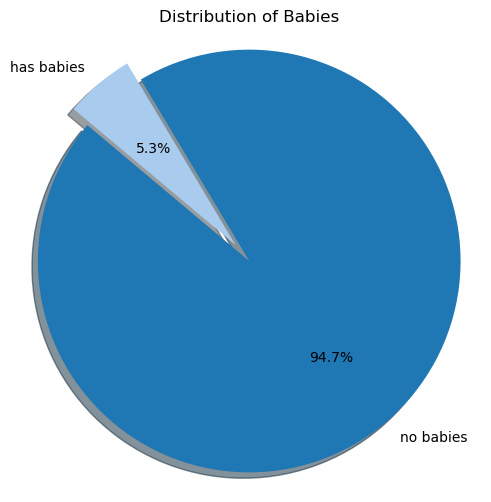

In [52]:

# Define the directory path
output_directory = os.path.join(path, '04 Analysis', 'Visualizations')

# Define the file path within the output directory
output_file = os.path.join(output_directory, 'baby_pie_chart.png')

# Count the number of occurrences for each category
baby_counts = df_all_subset['baby_flag'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))  # Set the size of the pie chart
colors = ['#1f77b4', '#a9cbee']  # Blue color palette
labels = baby_counts.index  # 'has babies' and 'no babies'
sizes = baby_counts.values
explode = (0.1, 0)  # Explode the first slice (has babies)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add a title
plt.title('Distribution of Babies')

# Save the pie chart to the specified file path
plt.savefig(output_file, bbox_inches='tight')

# Show the pie chart
plt.show()


## 6.e Visualization for meat/fish_consumer_flag profile

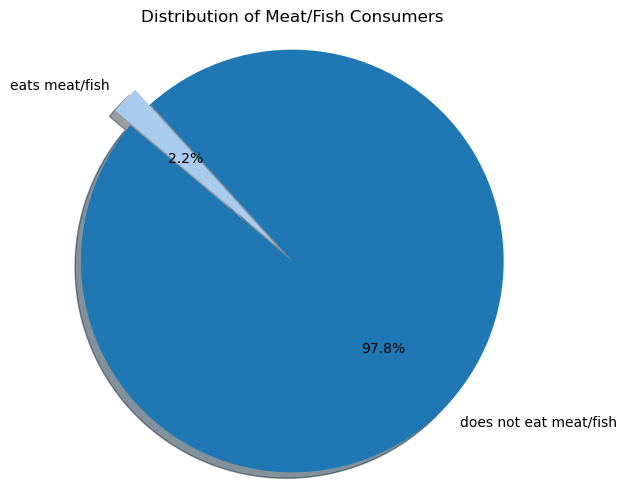

In [54]:
# Define the directory path
output_directory = os.path.join(path, '04 Analysis', 'Visualizations')

# Define the file path within the output directory
output_file = os.path.join(output_directory, 'meat_fish_pie_chart.png')

# Count the number of occurrences for each category
meat_fish_counts = df_all['meat_fish_consumer_flag'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))  # Set the size of the pie chart
colors = ['#1f77b4', '#a9cbee']  # Blue color palette
labels = meat_fish_counts.index  # 'has babies' and 'no babies'
sizes = meat_fish_counts.values
explode = (0.1, 0)  # Explode the first slice (has babies)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add a title
plt.title('Distribution of Meat/Fish Consumers')

# Save the pie chart to the specified file path
plt.savefig(output_file, bbox_inches='tight')

# Show the pie chart
plt.show()


## Visualization of meat-fish consumers based on income_level

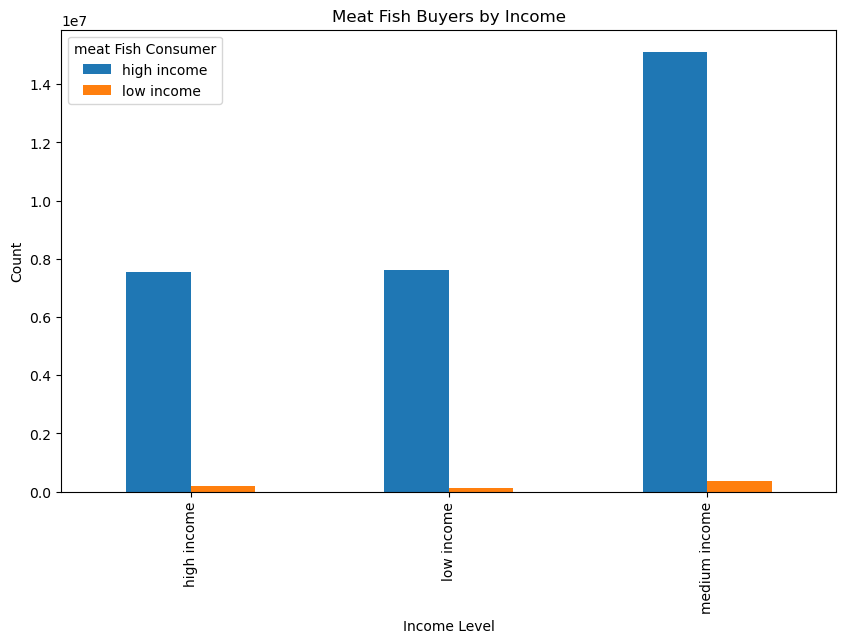

In [56]:
# Visualization of meat-fish consumers profile by income_level


meat_fish_income_level = pd.crosstab(df_all['income_level'], df_all['meat_fish_consumer_flag'], dropna=False)

# Create a grouped stacked bar chart using Pandas
bar7 = meat_fish_income_level.plot(kind='bar', figsize=(10, 6))
plt.title("Meat Fish Buyers by Income")
plt.xlabel("Income Level")
plt.ylabel("Count")
plt.legend(title='meat Fish Consumer', labels=meat_fish_income_level.index)

# Show the chart
plt.show()


## 6.e Visualization of family structrure customer profile

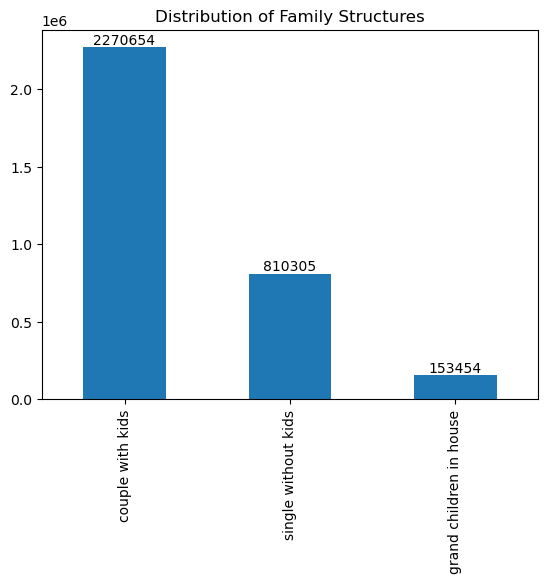

<Figure size 500x500 with 0 Axes>

In [58]:
# Create bar chart for the fam_structure profile

fambar = df_all_subset['fam_structure'].value_counts().plot.bar()

plt.figure(figsize=(5, 5))
fambar.set_title("Distribution of Family Structures")

# Annotate each bar with its count
for idx, value in enumerate(df_all_subset['fam_structure'].value_counts()):
    fambar.text(idx, value, str(value), ha='center', va='bottom', fontsize=10, color='black')
    

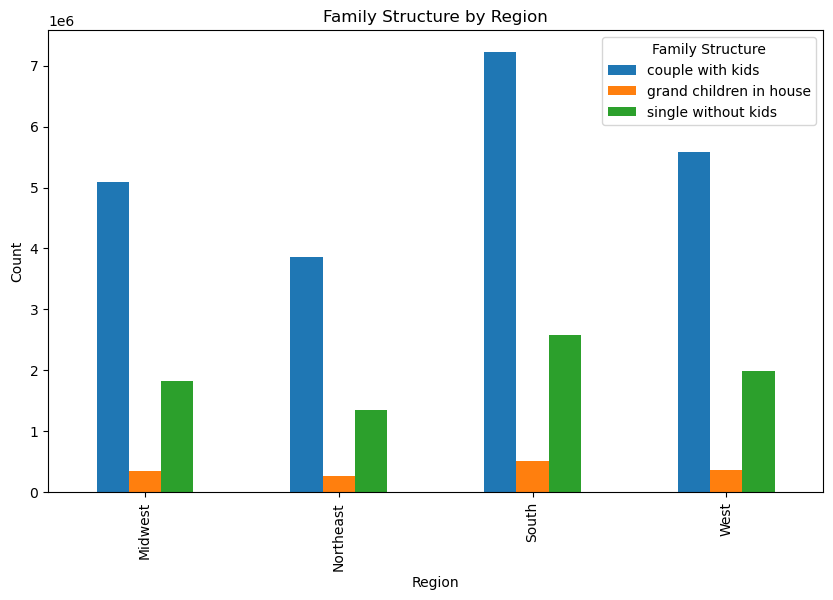

In [59]:
# Visualization of family structure profile by region

fam_structure_region = pd.crosstab(df_all['region'],df_all['fam_structure'],dropna = False)

# Grouped bar chart
bar4 = fam_structure_region.plot(kind='bar', figsize=(10, 6))
plt.title("Family Structure by Region")
plt.xlabel("Region")
plt.ylabel("Count")
plt.legend(title='Family Structure')

# Show the chart first
plt.show()



In [61]:
# Export visusalization 
bar4.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'family_structure_by_region.png'), bbox_inches='tight')


## 6.f Visualization for age_group_class_level profile

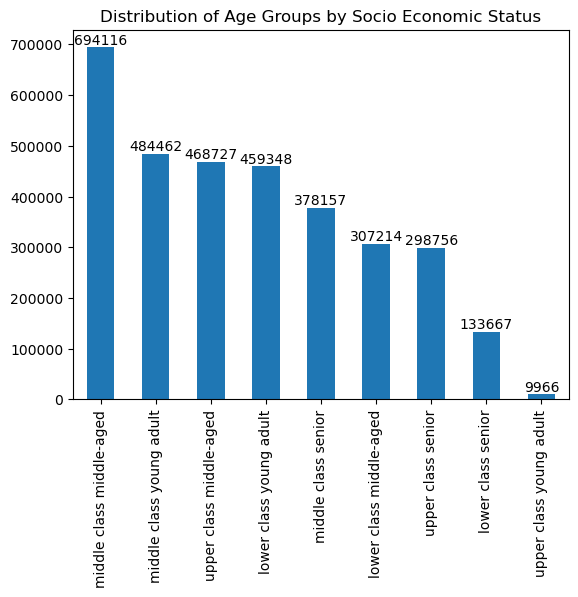

<Figure size 500x500 with 0 Axes>

In [60]:
# Create bar chart for the age_group_class_level profile


bar5 = df_all_subset['age_group_class_level'].value_counts().plot.bar()

plt.figure(figsize=(5, 5))
bar5.set_title("Distribution of Age Groups by Socio Economic Status")

# Annotate each bar with its count
for idx, value in enumerate(df_all_subset['age_group_class_level'].value_counts()):
    bar5.text(idx, value, str(value), ha='center', va='bottom', fontsize=10, color='black')



In [61]:
# Export visusalization 
bar5.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_gr_class_level.png'), bbox_inches='tight')


### 6.g Visuslazation by age group and class level

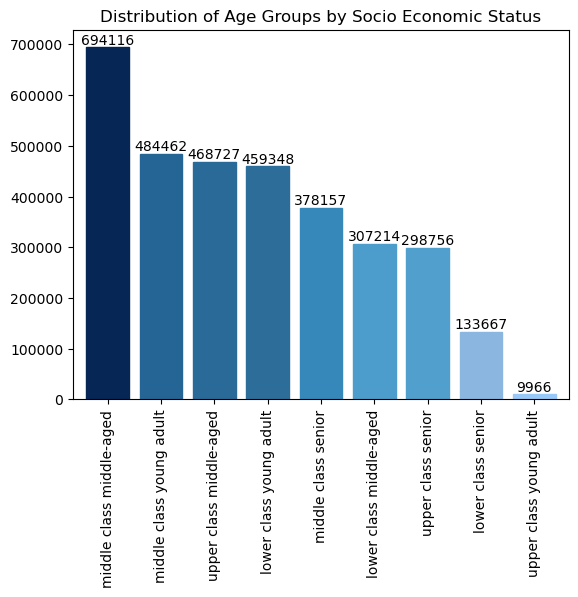

<Figure size 500x500 with 0 Axes>

In [62]:
import colorsys

# Create the bar chart and annotate each bar with its count
bar6 = df_all_subset['age_group_class_level'].value_counts().plot.bar(width=0.8)
plt.figure(figsize=(5, 5))
bar6.set_title("Distribution of Age Groups by Socio Economic Status")

# Annotate each bar with its count
for idx, value in enumerate(df_all_subset['age_group_class_level'].value_counts()):
    bar6.text(idx, value, str(value), ha='center', va='bottom', fontsize=10, color='black')

# Get the colormap
colormap = plt.cm.Blues

# Define a function to darken a color
def darken_color(color, factor=0.8):
    r, g, b, a = color
    h, l, s = colorsys.rgb_to_hls(r, g, b)
    l *= factor
    r, g, b = colorsys.hls_to_rgb(h, l, s)
    return r, g, b, a

# Customize the colors of the bars using a colormap
colormap = plt.cm.Blues
bars = bar6.patches  # Get the bars

# Assign colors to the bars, darkening each one
for bar, value in zip(bars, df_all_subset['age_group_class_level'].value_counts()):
    color = colormap(value / df_all_subset['age_group_class_level'].value_counts().max())
    darkened_color = darken_color(color, factor=0.8)  # Adjust the factor for darkness
    bar.set_color(darkened_color)

# Show the plot
plt.tight_layout()
plt.show()


In [63]:
# Export visusalization 

bar6.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'socio_eco_bar.png'), bbox_inches='tight')


### 6.h Visualization of customer profile by region based on loyalty flag

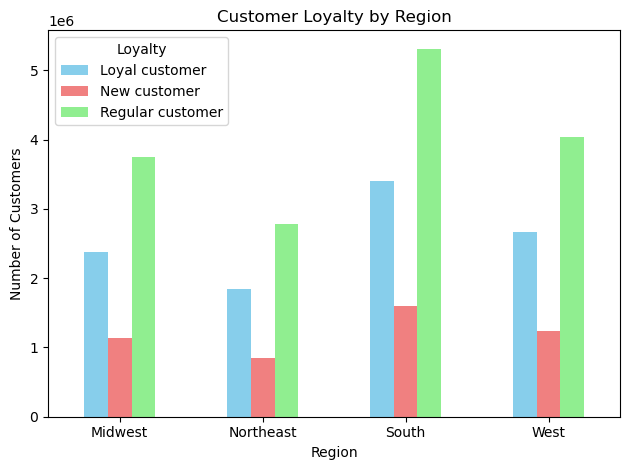

In [66]:
# Define colors for loyalty values
loyalty_colors = {'Loyal customer': 'skyblue',
                  'New customer': 'lightcoral',
                  'Regular customer': 'lightgreen'}

# Create a bar plot for customer loyalty by region using the existing crosstab
ax = loyalty_region.plot(kind='bar', color=[loyalty_colors[c] for c in loyalty_region.columns])

# Customize the plot
plt.title('Customer Loyalty by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.legend(title='Loyalty', loc='upper left')
plt.xticks(rotation=0)  # Ensure region labels are not rotated

# Export chart

output_path = os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_region.png')
plt.savefig(output_path)

# Show the plot
plt.tight_layout()
plt.show()

# 7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

### 7.1 Descriptive stats for prices grouped by age_flag

In [67]:
df_all.groupby('age_flag').agg({'prices' : ['mean', 'min', 'max']})

prices           
                       mean  min   max
age_flag                              
middle age adults  7.792707  1.0  25.0
senior             7.794342  1.0  25.0
young adults       7.784208  1.0  25.0

### 7.2 Descriptive stats from max_order grouped by age_flag

In [68]:
df_all.groupby('age_flag').agg({'max_order' : ['mean', 'min', 'max']})

max_order        
                        mean min max
age_flag                            
middle age adults  34.480244   5  99
senior             34.348679   5  99
young adults       34.407174   5  99

### 7.3 Descriptive stats for prices grouped by age_group_class_level


In [69]:
df_all.groupby('age_group_class_level').agg({'prices' : ['mean', 'min', 'max']})

prices           
                              mean  min   max
age_group_class_level                        
lower class middle-aged   7.034133  1.0  25.0
lower class senior        6.706150  1.0  25.0
lower class young adult   7.595307  1.0  25.0
middle class middle-aged  7.961166  1.0  25.0
middle class senior       7.952928  1.0  25.0
middle class young adult  7.949952  1.0  25.0
upper class middle-aged   7.949098  1.0  25.0
upper class senior        7.958393  1.0  25.0
upper class young adult   7.807389  1.0  25.0

### 7.4 Descriptive stats for max_order grouped by age_group_class_level


In [70]:
df_all.groupby('age_group_class_level').agg({'max_order' : ['mean', 'min', 'max']})

max_order        
                               mean min max
age_group_class_level                      
lower class middle-aged   33.375720   5  99
lower class senior        32.829857   5  99
lower class young adult   34.086930   5  99
middle class middle-aged  34.912471   5  99
middle class senior       34.482943   5  99
middle class young adult  34.561675   5  99
upper class middle-aged   34.433393   5  99
upper class senior        34.688837   5  99
upper class young adult   40.169202   5  99

# 8 Compare your customer profiles with regions and departments.

## 8.1 Family structure customer profile study

In [71]:
# Create crosstab to compare the number of orders per family structure within each region

ords_fam_structure = pd.crosstab(df_all['region'], df_all['fam_structure'], dropna=False)

ords_fam_structure.to_clipboard()

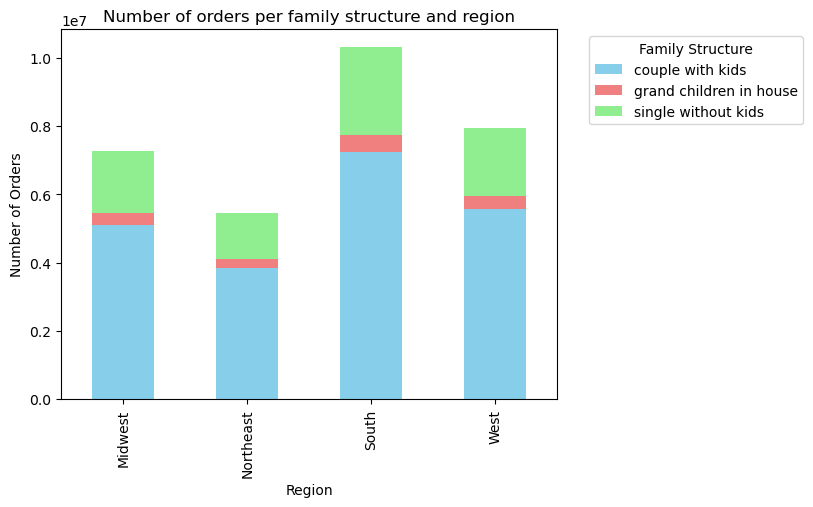

In [73]:

# Define custom colors for each family structure
custom_colors = {
    'couple with kids': 'skyblue',
    'grand children in house': 'lightcoral',
    'single without kids': 'lightgreen'
}

# Create a stacked bar chart with a colormap
crosst1 = ords_fam_structure.plot(kind='bar', stacked=True, title='Number of orders per family structure and region', 
                                 color=[custom_colors.get(category, 'gray') for category in ords_fam_structure.columns])

# Set labels
plt.xlabel('Region')
plt.ylabel('Number of Orders')
plt.legend(title='Family Structure', bbox_to_anchor=(1.05, 1), loc='upper left')

# Export bar chart
output_path = os.path.join(path, '04 Analysis', 'Visualizations', 'ords_fam_structure.png')
plt.savefig(output_path)

# Show the plot
plt.show()


In [74]:
# Create crosstab to compare the number of orders per family structure within each region (normalized to percentages)

ords_fam_structure_norm = pd.crosstab(df_all['region'], df_all['fam_structure'], normalize = 'index', dropna = False)

# Print the crosstab

ords_fam_structure_norm.to_clipboard()

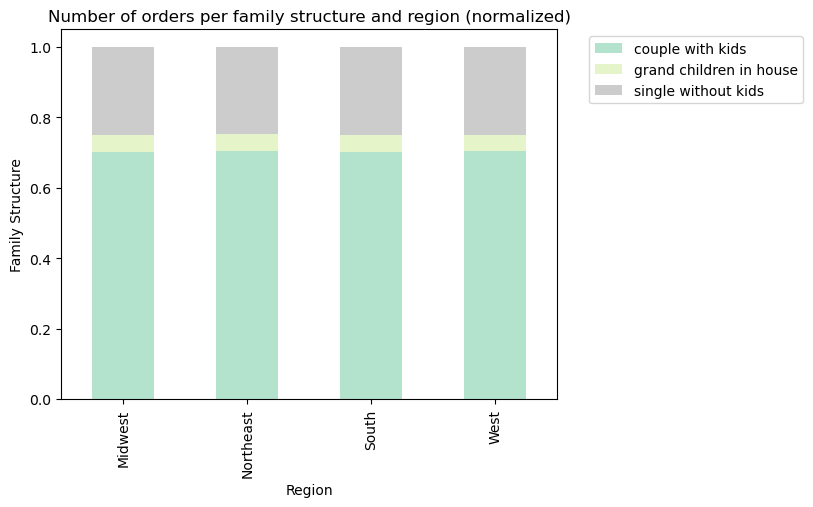

In [75]:
custom_colors = {
    'couple with kids': 'skyblue',  
    'grand children in house': 'lightcoral',
    'single without kids': 'lightgreen'
}

# Create a stacked bar chart with a colormap
crosst2 = ords_fam_structure_norm.plot(kind='bar', stacked=True, colormap='Pastel2', title='Number of orders per family structure and region (normalized)')

# Set labels
plt.xlabel('Region')
plt.ylabel('Family Structure')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

# Export bar chart
output_path = os.path.join(path, '04 Analysis', 'Visualizations', 'ords_fam_structure_norm.png')
plt.savefig(output_path)

# Show the plot
plt.show()

In [76]:
# Create crosstab to compare the number of orders per family structure and department

ords_fam_struc_dep = pd.crosstab(df_all['department'], df_all['fam_structure'], dropna = False)

ords_fam_struc_dep.to_clipboard()

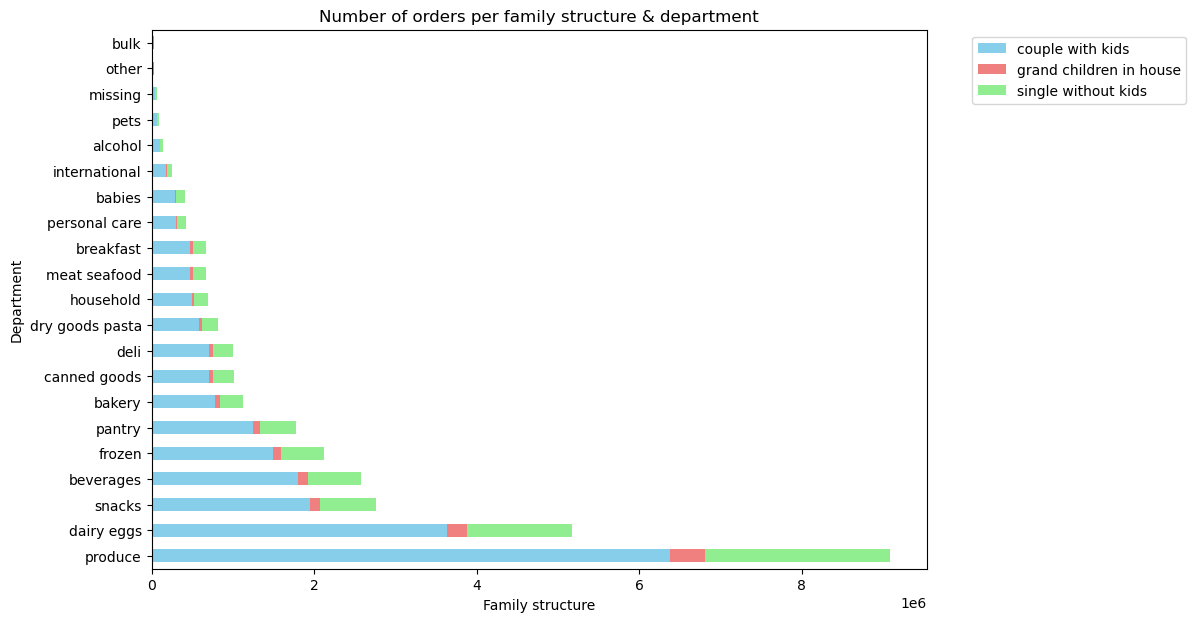

In [77]:
# Define a custom color palette for your family structure categories
custom_colors = {
    'couple with kids': 'skyblue',  
    'grand children in house': 'lightcoral',
    'single without kids': 'lightgreen'
}

# Calculate the sum of orders for each department
department_order1 = ords_fam_struc_dep.sum(axis=1).sort_values(ascending=False).index

# Reorder the crosstab based on the sorted departments
ords_fam_struc_dep_ordered = ords_fam_struc_dep.loc[department_order1]

# Create a stacked bar chart with horizontal bars and use the custom color palette
crosst3 = ords_fam_struc_dep_ordered.plot(
    kind='barh',
    stacked=True,
    title='Number of orders per family structure & department',
    figsize=(10, 7),
    color=[custom_colors.get(category, 'gray') for category in ords_fam_struc_dep_ordered.columns]  # Assign colors based on the custom palette
)

# Set labels
plt.xlabel('Family structure')
plt.ylabel('Department')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

# Export bar chart
output_path = os.path.join(path, '04 Analysis', 'Visualizations', 'ords_fam_structure_dep.png')
plt.savefig(output_path)


# Show the plot
plt.show()


## 8.2 Age group class level customer profile study


In [78]:
# Create crosstab to compare the number of orders per age group/class level within each region (normalized to percentages)

ords_age_class_reg = pd.crosstab(df_all['region'], df_all['age_group_class_level'], dropna = False)

# Copy to Excel

ords_age_class_reg.to_clipboard()

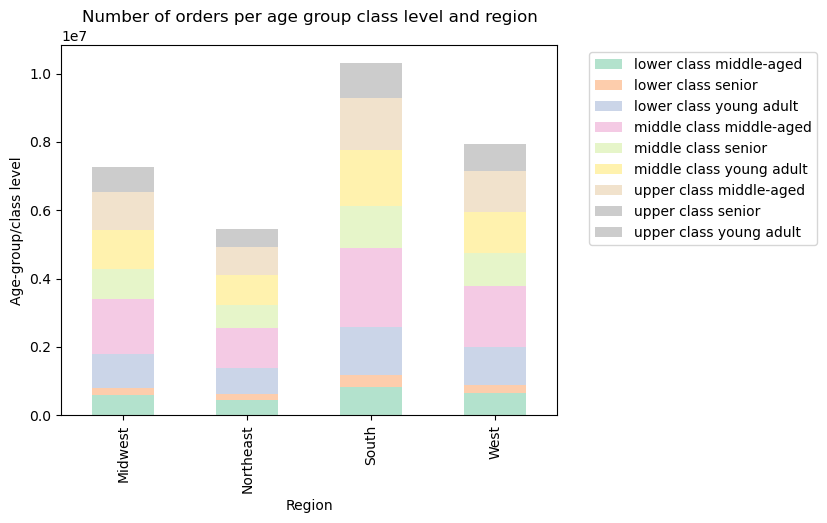

In [79]:
# Create a stacked bar chart with a colormap
crosst4 = ords_age_class_reg.plot(kind='bar', stacked=True, colormap='Pastel2', title='Number of orders per age group class level and region')

# Set labels
plt.xlabel('Region')
plt.ylabel('Age-group/class level')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')


# Export bar chart
output_path = os.path.join(path, '04 Analysis', 'Visualizations', 'ords_age_class_reg.png')
plt.savefig(output_path)


# Show the plot
plt.show()

In [81]:
# Create crosstab to compare the number of orders per age group/class level and department

ords_age_class_dep = pd.crosstab(df_all['department'], df_all['age_group_class_level'], dropna = False)

# Copy to excel

ords_age_class_dep.to_clipboard()

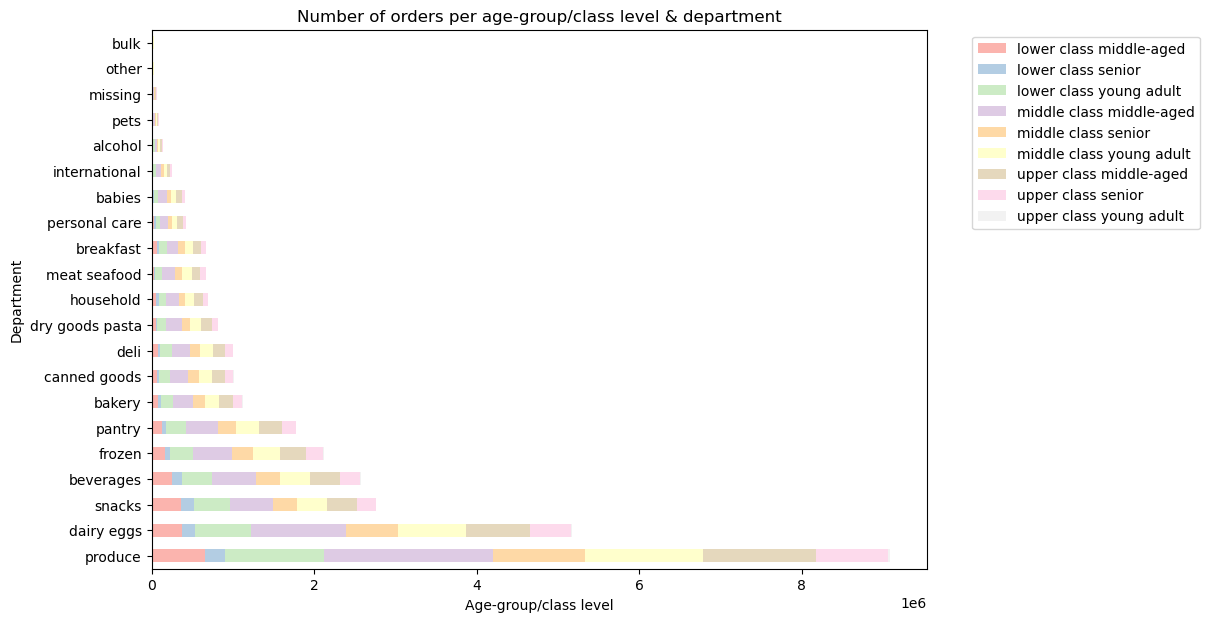

In [82]:
# Calculate the sum of orders for each department
department_order = ords_age_class_dep.sum(axis=1).sort_values(ascending=False).index

# Reorder the crosstab based on the sorted departments
ords_age_class_dep1 = ords_age_class_dep.loc[department_order]

# Create a stacked bar chart with horizontal bars
crosst5 = ords_age_class_dep1.plot(kind='barh', stacked=True, colormap='Pastel1', title='Number of orders per age-group/class level & department', figsize=(10, 7))

# Set labels
plt.xlabel('Age-group/class level')
plt.ylabel('Department')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

# Export bar chart
output_path = os.path.join(path, '04 Analysis', 'Visualizations', 'ords_age_class_dep.png')
plt.savefig(output_path)


# Show the plot
plt.show()

## 8.3 Age group and loyalty flag customer profile study


In [83]:
# Create a crosstab to compare number of orders per age group and loyalty

ords_age_loyalty = pd.crosstab(df_all['loyalty_flag'], df_all['age_flag'], dropna=False)


# Print the crosstab

ords_age_loyalty.to_clipboard()

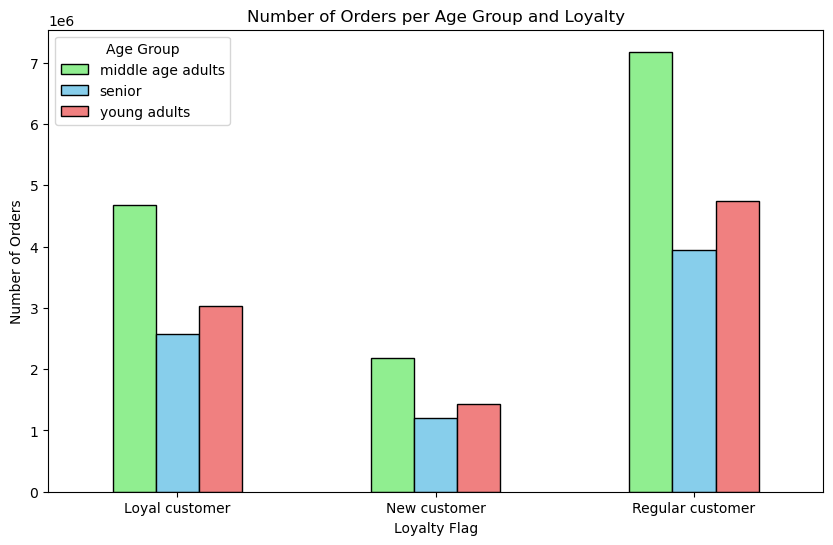

In [85]:
# Define custom colors for age groups
colors = ['lightgreen', 'skyblue', 'lightcoral']

# Create a bar chart with custom colors
ords_age_loyalty.plot(kind='bar', color=colors, figsize=(10, 6), edgecolor='black')

# Customize the plot
plt.xlabel('Loyalty Flag')
plt.ylabel('Number of Orders')
plt.title('Number of Orders per Age Group and Loyalty')
plt.xticks(rotation=0)  


# Export bar chart
output_path = os.path.join(path, '04 Analysis', 'Visualizations', 'ords_age_loyalty.png')
plt.savefig(output_path)

# Show the plot
plt.legend(title='Age Group', loc='upper left')
plt.show()

## 8.4 Age group and price range customer profile study


In [86]:
# Create the crosstab with 'age_flag' as rows and 'price_range_loc' as columns
ords_age_price = pd.crosstab(df_all['age_flag'], df_all['price_range_loc'], dropna=False)

# Display the crosstab

ords_age_price.to_clipboard()

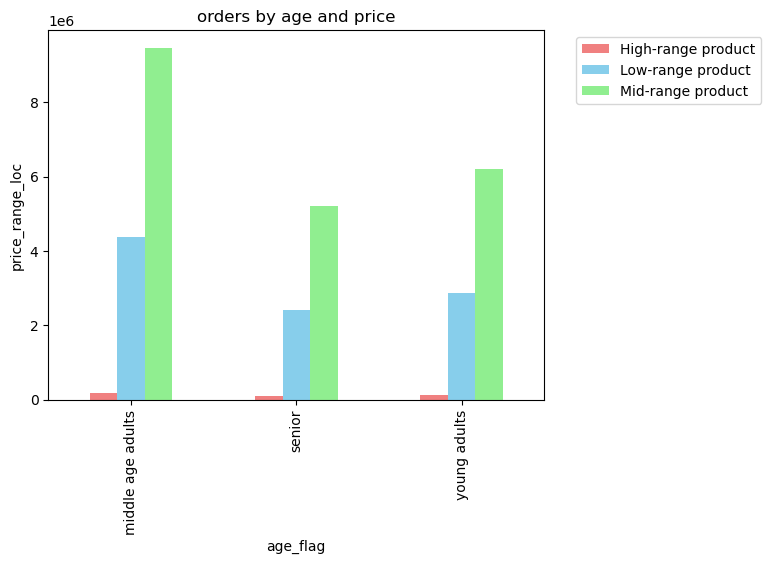

In [87]:
#  Create Visualization to view spending habits

# Define a custom color palette for your family structure categories
custom_colors = {
    'Low-range product': 'skyblue',  
    'High-range product': 'lightcoral',
    'Mid-range product': 'lightgreen'
}
# Create a stacked bar chart with a colormap
crosst6 = ords_age_price.plot(kind='bar', title='orders by age and price', 
                                 color=[custom_colors.get(category, 'gray') for category in ords_age_price.columns])

# Set labels
plt.xlabel('age_flag')
plt.ylabel('price_range_loc')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

# Export bar chart
output_path = os.path.join(path, '04 Analysis', 'Visualizations', 'ords_age_price.png')
plt.savefig(output_path)

# Show the plot
plt.show()

## 8.5 Relationship between number of orders, fam_structure and region

In [88]:
# Group dataframe to create heatmap

heatmap_data = df_all.groupby(['fam_structure', 'region']).count()['order_id'].unstack().fillna(0)


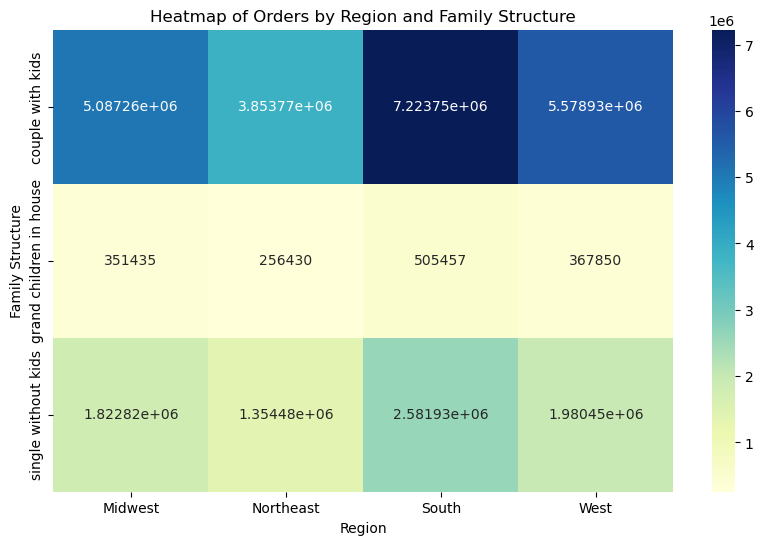

In [89]:
# Create the heatmap
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(heatmap_data, annot=True, fmt='g', cmap='YlGnBu')
plt.title('Heatmap of Orders by Region and Family Structure')
plt.xlabel('Region')
plt.ylabel('Family Structure')


# Display the heatmap
plt.show()

## 8.6 Relationship between orders, age_group_class_level and region

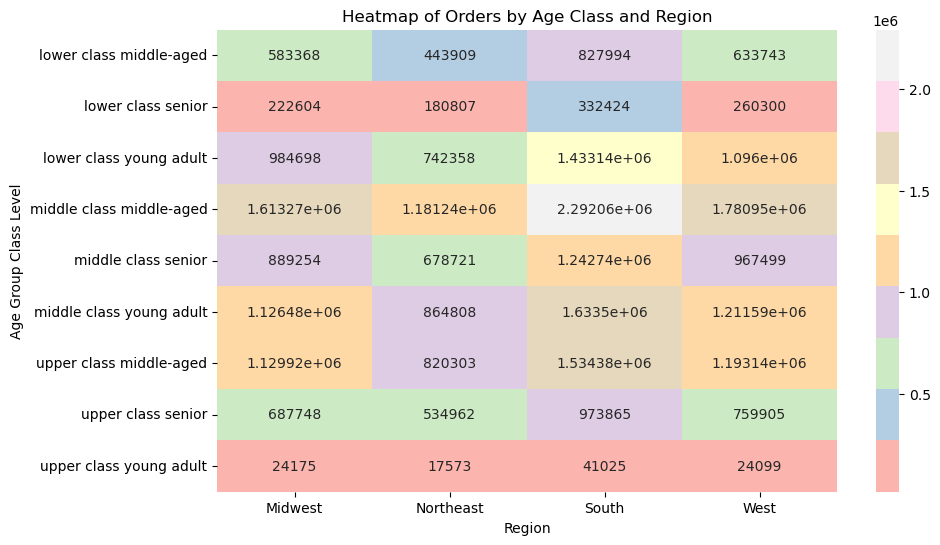

In [90]:
# Group the DataFrame by 'region' and 'age_group_class_level' and count the number of orders
heatmap_data = df_all.groupby(['age_group_class_level', 'region']).count()['order_id'].unstack().fillna(0)

# Create the heatmap with the 'Pastel' colormap
plt.figure(figsize=(10, 6))
heatmap1 = sns.heatmap(heatmap_data, annot=True, fmt='g', cmap='Pastel1')
plt.title('Heatmap of Orders by Age Class and Region')
plt.xlabel('Region')
plt.ylabel('Age Group Class Level')

# Display the heatmap
plt.show()

In [91]:
df_all.describe()

,age,n_dependants,income,order_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,avg_spend,median_days_since_prior
count,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.095969e+07,3.096456e+07,3.096456e+07,3.096456e+07
mean,4.946803e+01,1.501819e+00,9.967587e+04,1.710317e+06,1.783414e+01,2.741397e+00,1.341098e+01,1.023032e+01,2.559850e+04,8.363038e+00,6.061019e-01,7.118859e+01,9.922365e+00,7.790590e+00,3.442569e+01,1.193352e+01,9.337764e+00
std,1.848528e+01,1.118896e+00,4.314187e+04,9.873785e+05,1.763442e+01,2.089254e+00,4.248845e+00,8.693523e+00,1.408096e+04,7.135399e+00,4.886127e-01,3.822194e+01,6.282441e+00,4.240595e+00,2.489504e+01,7.992284e+01,6.077206e+00
min,1.800000e+01,0.000000e+00,2.590300e+04,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.000000e+00,1.000000e+00,0.000000e+00
25%,3.300000e+01,1.000000e+00,6.729200e+04,8.554120e+05,5.000000e+00,1.000000e+00,1.000000e+01,4.000000e+00,1.354400e+04,3.000000e+00,0.000000e+00,3.100000e+01,4.000000e+00,4.200000e+00,1.400000e+01,7.392889e+00,6.000000e+00
50%,4.900000e+01,2.000000e+00,9.676500e+04,1.710404e+06,1.200000e+01,3.000000e+00,1.300000e+01,7.000000e+00,2.528800e+04,6.000000e+00,1.000000e+00,8.300000e+01,9.000000e+00,7.400000e+00,2.800000e+01,7.825143e+00,7.000000e+00
75%,6.500000e+01,3.000000e+00,1.281020e+05,2.565206e+06,2.500000e+01,5.000000e+00,1.600000e+01,1.400000e+01,3.794700e+04,1.100000e+01,1.000000e+00,1.070000e+02,1.600000e+01,1.130000e+01,4.800000e+01,8.249596e+00,1.100000e+01
max,8.100000e+01,3.000000e+00,5.939010e+05,3.421083e+06,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,4.968800e+04,1.450000e+02,1.000000e+00,1.340000e+02,2.100000e+01,2.500000e+01,9.900000e+01,1.500694e+04,3.000000e+01


## 8.7 Avg Spend, order frequency & product preference for age_group_class_level profile

In [92]:
# Group by 'region' and 'age_group_class_level', and calculate the average spend

avg_spend_by_region_age_class = df_all.groupby(['region', 'age_group_class_level'])['avg_spend'].mean().reset_index()


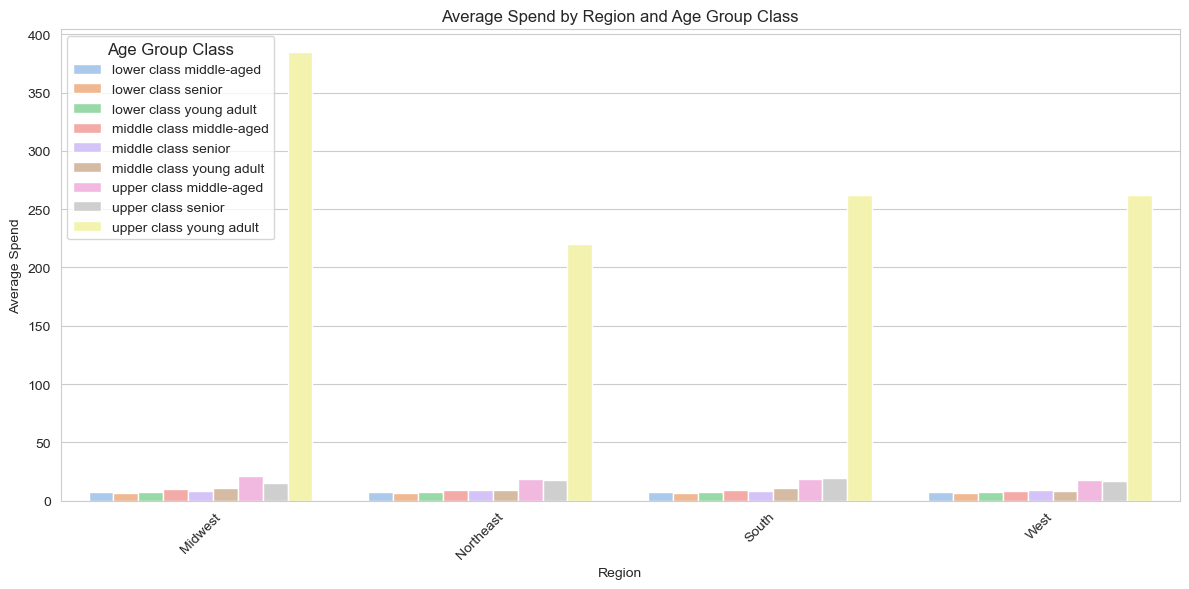

In [93]:
## Create a visualization

# Set a pleasing plot style using Seaborn
sns.set_style("whitegrid")

# Create a bar chart
plt.figure(figsize=(12, 6))
barchart = sns.barplot(x='region', y='avg_spend', hue='age_group_class_level', data=avg_spend_by_region_age_class, palette='pastel')
plt.title('Average Spend by Region and Age Group Class')
plt.xlabel('Region')
plt.ylabel('Average Spend')
plt.xticks(rotation=45)
plt.legend(title='Age Group Class', title_fontsize='12')
plt.tight_layout()

# Show the plot
plt.show()

<Figure size 1200x600 with 0 Axes>

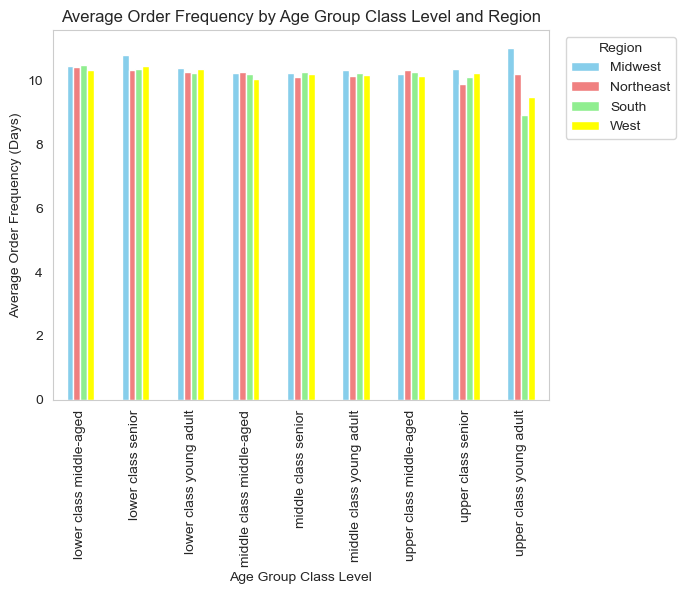

In [94]:
# Group Data by Age Group Class Level and Region
grouped_by_both = df_all.groupby(['age_group_class_level', 'region'])

# Calculate Order Frequency by Age Group Class Level and Region
order_frequency_by_both = grouped_by_both['days_since_prior_order'].mean().unstack()

# Define custom colors
colors = ['skyblue', 'lightcoral', 'lightgreen', 'yellow']

# Create a bar chart for Order Frequency by Age Group Class Level and Region
plt.figure(figsize=(12, 6))
barchart1 = order_frequency_by_both.plot(kind='bar', color=colors)

plt.title('Average Order Frequency by Age Group Class Level and Region')
plt.xlabel('Age Group Class Level')
plt.ylabel('Average Order Frequency (Days)')

# Remove the grid
plt.grid(False)

# Move the legend to the upper right corner outside the chart
plt.legend(title='Region', bbox_to_anchor=(1.02, 1), loc='upper left')


# Display the chart
plt.show()


<Figure size 1200x600 with 0 Axes>

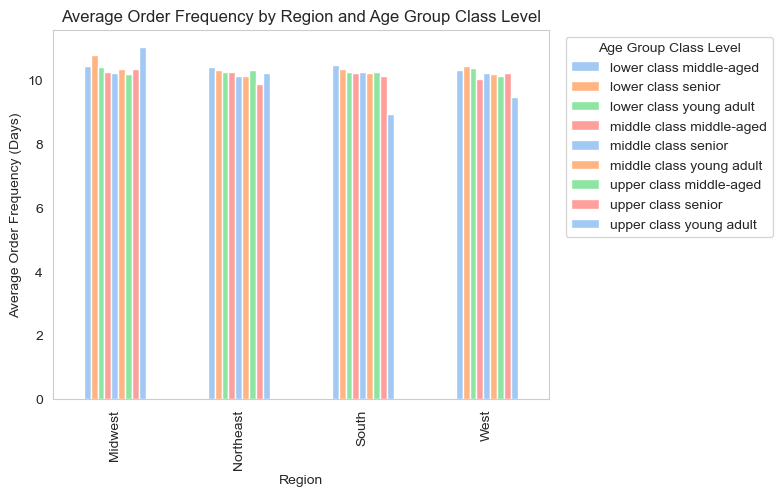

In [95]:
# Group Data by Age Group Class Level and Region
grouped_by_both = df_all.groupby(['age_group_class_level', 'region'])

# Calculate Order Frequency by Age Group Class Level and Region
order_frequency_by_both = grouped_by_both['days_since_prior_order'].mean().unstack()

# Use the pastel color palette
colors = sns.color_palette('pastel', n_colors=len(order_frequency_by_both.columns))

# Create a bar chart for Order Frequency by Age Group Class Level and Region
plt.figure(figsize=(12, 6))
barchart2 = order_frequency_by_both.T.plot(kind='bar', color=colors)

plt.title('Average Order Frequency by Region and Age Group Class Level')
plt.xlabel('Region')
plt.ylabel('Average Order Frequency (Days)')

# Remove the grid
plt.grid(False)

# Move the legend to the upper right corner outside the chart
plt.legend(title='Age Group Class Level', bbox_to_anchor=(1.02, 1), loc='upper left')


# Display the chart
plt.show()


## 8.8 Department preference by region

<Figure size 1200x600 with 0 Axes>

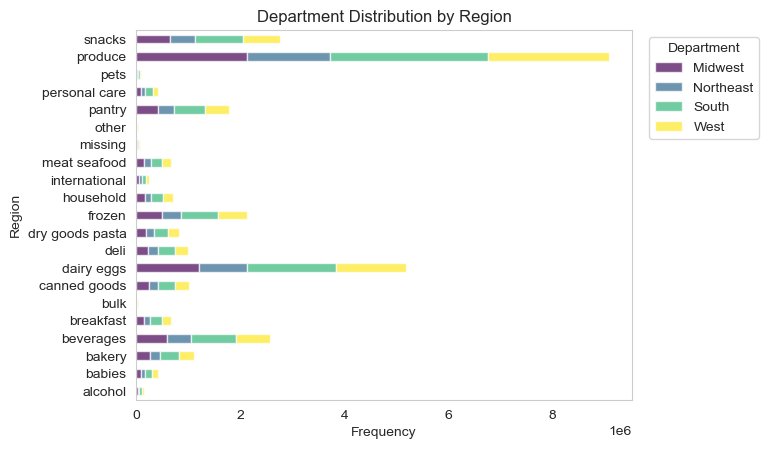

In [96]:
## Department preference by region

# Calculate department preferences by region
department_preferences_by_region = df_all.groupby(['region', 'department']).size().unstack(fill_value=0)

# Create a horizontal stacked bar chart for department distribution by region
plt.figure(figsize=(12, 6))
barchart3=department_preferences_by_region.T.plot(kind='barh', stacked=True, colormap='viridis', alpha=0.7)

plt.title('Department Distribution by Region')
plt.xlabel('Frequency')
plt.ylabel('Region')

# Remove the grid
plt.grid(False)

# Move the legend to the upper right corner outside the chart
plt.legend(title='Department', bbox_to_anchor=(1.02, 1), loc='upper left')

# Show the chart
plt.show()


<Figure size 1200x600 with 0 Axes>

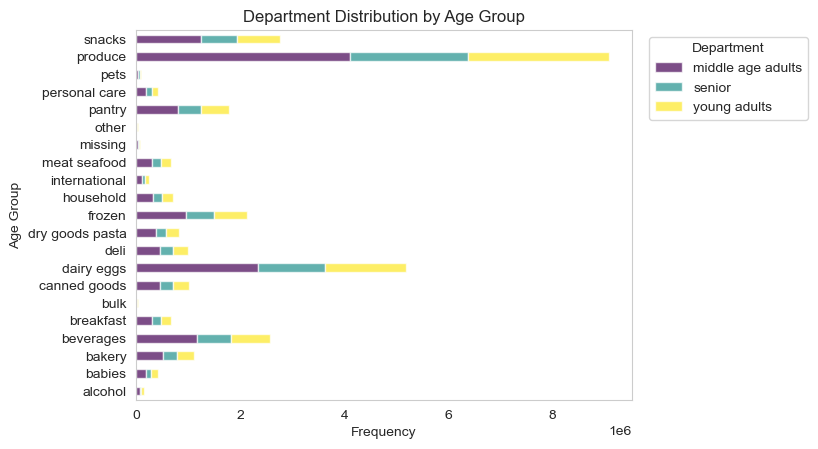

In [97]:
## Department preference by age_flag

# Calculate department preferences by region
department_preferences_by_age_flag = df_all.groupby(['age_flag', 'department']).size().unstack(fill_value=0)

# Create a horizontal stacked bar chart for department distribution by age_flag
plt.figure(figsize=(12, 6))
barchart4=department_preferences_by_age_flag.T.plot(kind='barh', stacked=True, colormap='viridis', alpha=0.7)

plt.title('Department Distribution by Age Group')
plt.xlabel('Frequency')
plt.ylabel('Age Group')

# Remove the grid
plt.grid(False)

# Move the legend to the upper right corner outside the chart
plt.legend(title='Department', bbox_to_anchor=(1.02, 1), loc='upper left')

# Show the chart
plt.show()

In [98]:
## Export Visualizations:

heatmap1.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'heatmap.png'), bbox_inches='tight')

barchart.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'avg_spend.png'), bbox_inches='tight')

barchart2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'ord_freq_reg_age.png'), bbox_inches='tight')

barchart3.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dep_region.png'), bbox_inches='tight')

barchart4.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dep_age.png'), bbox_inches='tight')


# Key Questions

## 1. Busiest days of the week and hours of the day

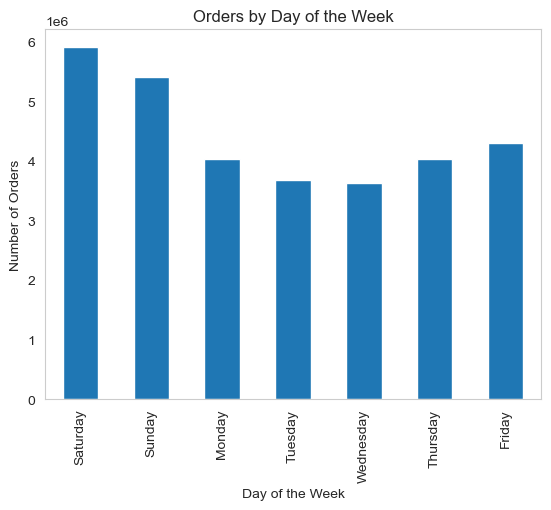

In [99]:
## I want to rename the numerical values on my x axis to the corresponding days of the week based on my project brief.
# I will create a mapping of numerical values to days of the week.

day_mapping = {
    0: 'Saturday',
    1: 'Sunday',
    2: 'Monday',
    3: 'Tuesday',
    4: 'Wednesday',
    5: 'Thursday',
    6: 'Friday'
}

## Count the occurences of each day of the week and use sort_index function to sort the bars according to their index

day_counts = df_all['orders_day_of_week'].value_counts().sort_index()

# Rename the index (numeric values) using the day_mapping dictionary

day_counts.index = day_counts.index.map(day_mapping)

## Create the bar chart

bar_b = day_counts.plot.bar()

# Set the title and labels for the chart

plt.title('Orders by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')

# Remove the grid
plt.grid(False)

# export bar chart

output_filename = os.path.join(path, '04 Analysis', 'Visualizations', 'busiest_days.png')
plt.savefig(output_filename)

## Display the chart

plt.show()

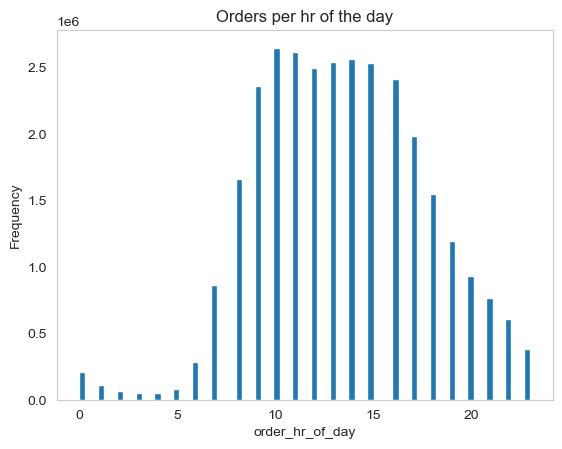

In [100]:
## Busiest hour of the day histogram


hist = df_all['order_hour_of_day'].plot.hist(bins = 72)
plt.title("Orders per hr of the day")
plt.xlabel("order_hr_of_day")
plt.ylabel("Frequency")

# Remove the grid
plt.grid(False)

# Save the histogram to the specified file location

output_path = os.path.join(path, '04 Analysis', 'Visualizations', 'hist_ordersbyhr.png')
plt.savefig(output_path)

# Show the histogram

plt.show()

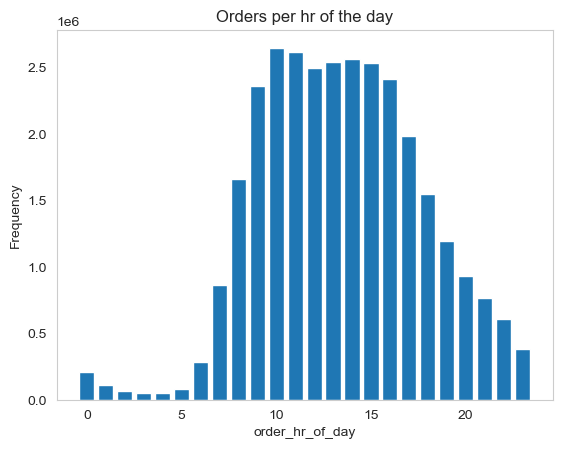

In [101]:
data = df_all['order_hour_of_day'].value_counts().sort_index()
categories = data.index

# Create a bar chart
plt.bar(categories, data)

# Customize the chart
plt.title("Orders per hr of the day")
plt.xlabel("order_hr_of_day")
plt.ylabel("Frequency")

# Remove the grid
plt.grid(False)

# Save the bar chart to the specified file location
output_path = os.path.join(path, '04 Analysis', 'Visualizations', 'bar2_ordersbyhr.png')
plt.savefig(output_path)

# Show the bar chart
plt.show()


## 2. Times of the day when people spend the most money

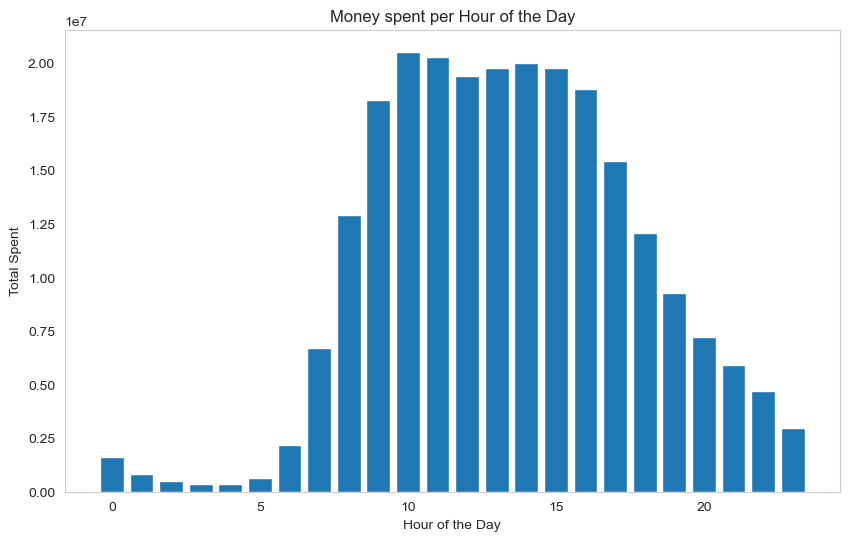

In [102]:
# Group data by order_hour_of_day and sum prices
hourly_prices = df_all.groupby('order_hour_of_day')['prices'].sum()

# Create the bar chart
plt.figure(figsize=(10, 6))
bar7 = plt.bar(hourly_prices.index, hourly_prices.values)

# Set titles and labels
plt.title('Money spent per Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Spent')

# Remove the grid
plt.grid(False)

# Save the bar chart to the specified file location
output_path = os.path.join(path, '04 Analysis', 'Visualizations', 'times_money.png')
plt.savefig(output_path)

# Show the bar chart
plt.show()


## 3. Instacart has a lot of products with different price tags. Marketing and sales want to use simpler price range groupings to help direct their efforts

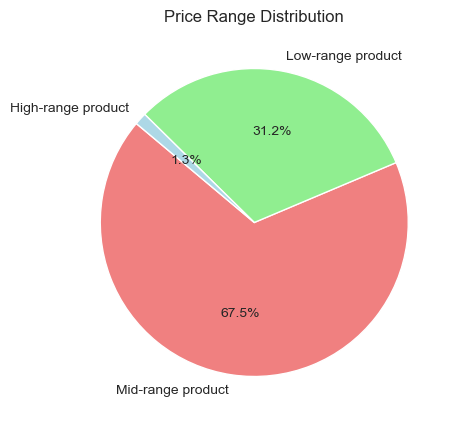

In [105]:
## note the price range flag was created in excercise 4.7 so all that is left is to create a
# visulaization of the price range flag.

value_counts = df_all['price_range_loc'].value_counts()

# Define custom colors
colors = ['lightcoral', 'lightgreen', 'lightblue']

# Create a pie chart
plt.figure(figsize=(5, 5))  # Set the figure size (optional)

# Plot the pie chart with custom colors
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)

# Add a title
plt.title('Price Range Distribution')

# Save the pie chart as an image
output_path = os.path.join(path, '04 Analysis', 'Visualizations', 'price_range_pie_chart.png')
plt.savefig(output_path)

# Show the chart
plt.show()


## 4. Which departments have the highest frequency of product orders

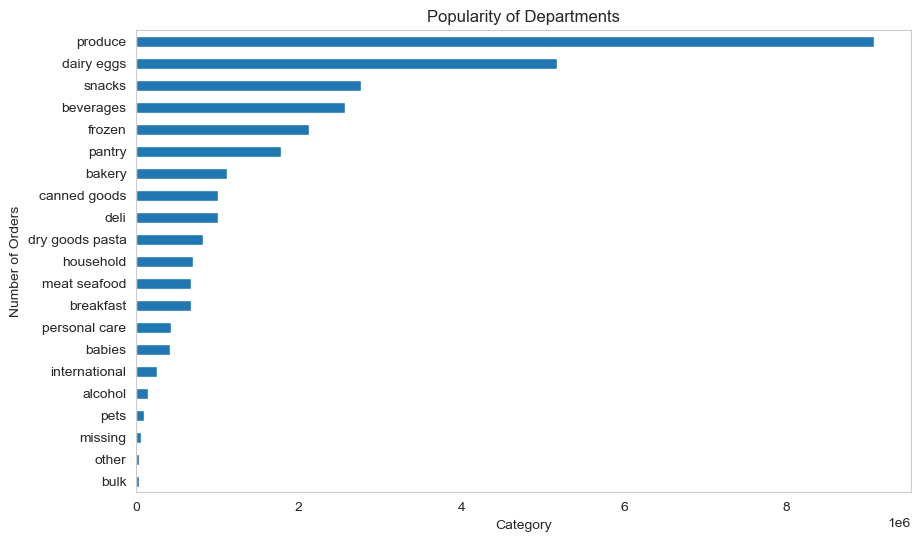

In [106]:
# Create bar chart for 'department' variable
plt.figure(figsize=(10, 6))
bar8 = df_all['department'].value_counts().sort_values(ascending = True).plot.barh()

# Set title and labels
plt.title("Popularity of Departments")
plt.xlabel("Category")
plt.ylabel("Number of Orders")

# Remove the grid
plt.grid(False)

# Save the bar chart to the specified file location
output_path = os.path.join(path, '04 Analysis', 'Visualizations', 'dpt_frequency.png')
plt.savefig(output_path)

# Show the bar chart
plt.show()

## 5. Ordering behaviour

### 5.a What's the distribution among users in regards to their brand loyalty?

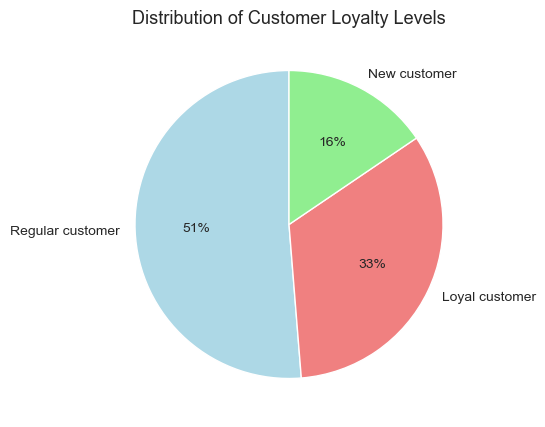

In [107]:
## Distribution among users in regards to their brand loyalty

import matplotlib.pyplot as plt
import os

# Define the colors
colors = ['lightblue', 'lightcoral', 'lightgreen']


# Create the pie chart with custom colors
loyalty_pie = df_all['loyalty_flag'].value_counts().plot.pie(
    figsize=(5, 5),
    autopct='%1.0f%%',
    startangle=90,
    colors=colors  # Use the custom colors here
)

plt.ylabel('')
plt.title('Distribution of Customer Loyalty Levels', fontsize=13)

# Remove the grid
plt.grid(False)

# Export loyalty pie
output_path = os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_pie.png')
plt.savefig(output_path)

# Show the pie chart
plt.show()


### 5b Are there differences in ordring habits based on customer's loyalty status?

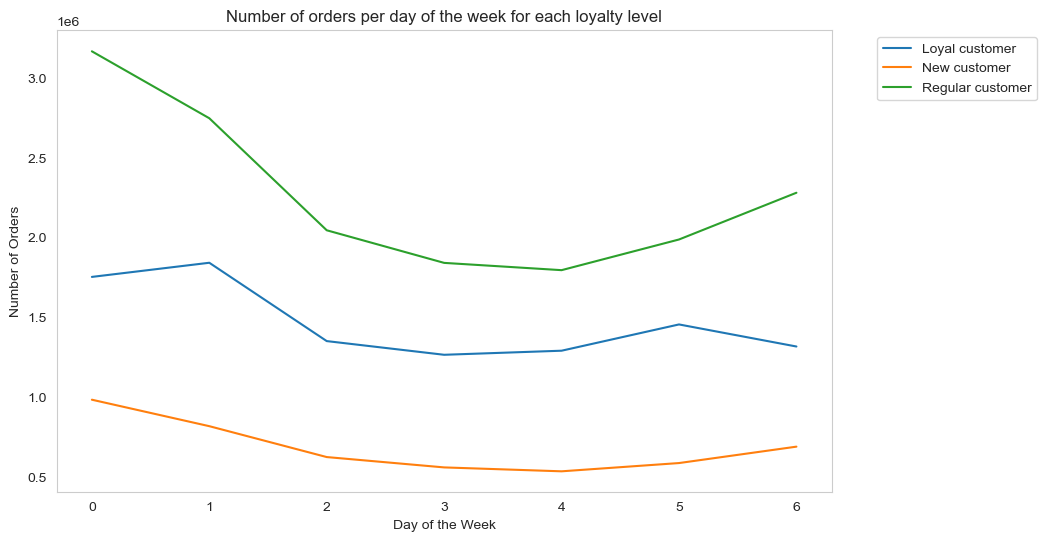

In [108]:
## Are there differences in ordering habits based on customer's loyalty status?

# Create crosstab 
crss_day_loyalty = pd.crosstab(index = df_all['orders_day_of_week'], columns = df_all['loyalty_flag'])

# Create line chart
line_day_loyal = crss_day_loyalty.plot(kind ='line', figsize = (10, 6))

plt.title('Number of orders per day of the week for each loyalty level')
plt.legend(bbox_to_anchor = (1.05, 1.0), loc = 'upper left')
plt.xlabel("Day of the Week")
plt.ylabel("Number of Orders")

# Remove the grid
plt.grid(False)

# Export line chart

output_path = os.path.join(path, '04 Analysis', 'Visualizations', 'ordering_habits_loyalty.png')
plt.savefig(output_path)

# Show the line chart
plt.show()